<a href="https://colab.research.google.com/github/jainakki16/Stroke-Prediction/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To DO - 1
Add hypertension and heart_disease in bivariate analysis categorical section

# TO DO - 2
Multivariate data analysis
Avg glucose level with age vs stroke

Reference intervals -

*    https://www.singlecare.com/blog/normal-blood-glucose-levels/
*   https://2.bp.blogspot.com/-QSGz7kZ9k-o/W_F3fA1U9zI/AAAAAAAAC-M/udhZeC1hm-0ppf5zGBAFSkNjOF5HPB0AgCLcBGAs/s1600/blood%2Bglucose%2Blevel%2Bchart.png

# TO DO - 3
Proportion of stroke above bars


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/jainakki16/Stroke-Prediction/main/dataset.csv')
data.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2921,47810,Male,8.0,0,0,No,children,Rural,107.97,26.7,Unknown,0
3608,70022,Male,32.0,0,0,No,Private,Rural,61.11,32.7,never smoked,0
1719,5451,Male,34.0,0,0,Yes,Private,Rural,86.51,NaN,formerly smoked,0
2720,2457,Female,67.0,0,1,Yes,Self-employed,Rural,94.45,29.6,formerly smoked,0
1937,72096,Female,41.0,0,0,Yes,Private,Rural,121.44,20.4,never smoked,0


In [3]:
data.shape 

(5110, 12)

In [4]:
data.rename(columns={'Residence_type':'residence_type','ever_married':'marital_status'}, inplace=True)
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease',
       'marital_status', 'work_type', 'residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   marital_status     5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# EDA

In [6]:
stroke_df = data.copy(deep=True)
stroke_df.drop('id', axis=1, inplace=True)
stroke_df.head()

,gender,age,hypertension,heart_disease,marital_status,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
stroke_df.replace(to_replace='Unknown',value=np.nan,inplace=True)

In [8]:
stroke_df.duplicated().sum()

0

In [9]:
stroke_df = stroke_df.astype({'age':int})

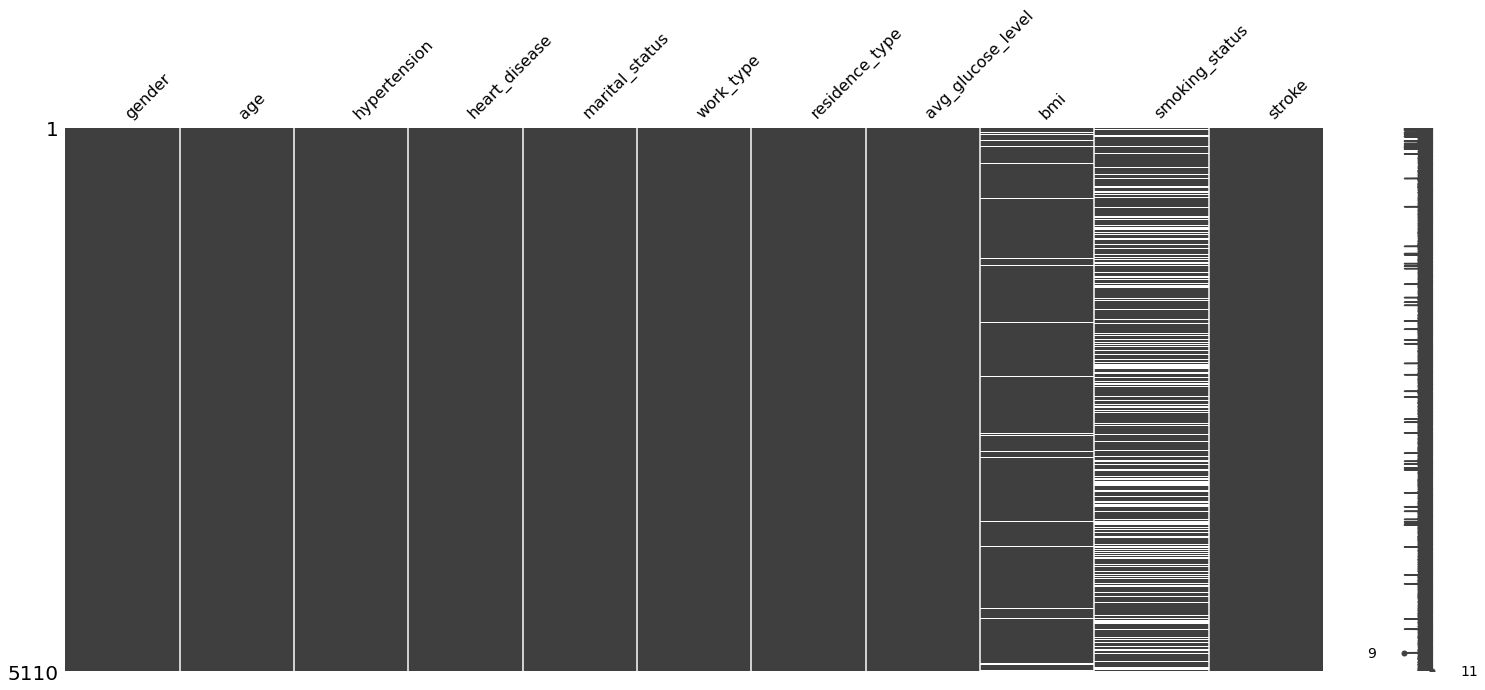

In [10]:
msno.matrix(stroke_df)
plt.show()

In [11]:
stroke_df.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
marital_status          0
work_type               0
residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [12]:
stroke_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'marital_status',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

**Categorical Features** --> gender, marital_status, work_type,residence_type, smoking_status

**Quantative Features** --> 
*   **Discrete** --> id, hypertension, heart_disease
*   **Continuous** --> avg_glucose_level, bmi


  
  



# Univariate Analysis

## Helper Functions

In [13]:
def get_pie_chart(data, labels, title): 
  fig, ax = plt.subplots(1, 1, figsize=(8, 6))

  ax.pie(x = data, 
        labels = labels, 
        explode = [0, 0.2],
        autopct = '%1.1f%%', 
        textprops = {'fontsize': 14}, 
        shadow = True)

  ax.set_title(title, size=14)
  plt.show()

In [14]:
def get_categ_plot(data):
  fig, ax = plt.subplots(3, 1, figsize=(11, 9), sharex=True)

  sns.distplot(x=data, ax=ax[0], kde=True)
  ax[0].set_title('Distplot')

  sns.boxplot(x=data, ax=ax[1])
  ax[1].set_title('Boxplot')

  sns.violinplot(x=data, ax=ax[2])
  ax[2].set_title('Violinplot')

  plt.show()

In [15]:
def horizontal_bars(name,prop,title):
  '''
  name: column name
  prop: proportion of male/female show-up 
  title: title of graph
  return: horizontal bar graph
  '''
  fig, ax = plt.subplots(figsize =(10, 5))
  ax.barh(name, prop, color=['green', 'red'])

  # To add grid
  ax.grid(b = True, color ='grey',
          linestyle ='-.', linewidth = 0.5,
          alpha = 0.2)

  # To remove axes
  for s in ['top', 'bottom', 'left', 'right']:
      ax.spines[s].set_visible(False)

  # To remove x and y ticks
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')

  plt.xticks(fontsize=10)
  plt.yticks(fontsize=12)

  # Add padding between axes and labels
  ax.xaxis.set_tick_params(pad = 5)
  ax.yaxis.set_tick_params(pad = 15)

  plt.xlabel('\n\nProportion of strokes',fontsize=12)
  plt.ylabel('Stroke',fontsize=12)
  ax.set_title(title,fontsize = 15 )

  for i in ax.patches:
      plt.text(i.get_width()+0.01, i.get_y()+0.4,
              str(round((i.get_width()), 2)),
              fontsize = 12, fontweight ='bold',
              color ='grey')
      
  plt.show()

In [16]:
def get_stroke_rel(feature,bin_labels,bin_edges):
  stroke_rel = stroke_df[[feature, 'stroke']]
  stroke_rel['type_level'] = pd.cut(x = stroke_rel[feature], bins = bin_edges, labels=bin_labels)
  no_strokes = stroke_rel.groupby(by='type_level').sum().stroke
  total_people = stroke_rel.groupby(by='type_level').count().stroke
  prop_stroke = (no_strokes/total_people*100).reset_index(name='prop_of_stroke')
  return prop_stroke

In [17]:
def get_barplot(prop_stroke, xlab, ylab, title, line = False):

  fig, ax = plt.subplots(1,1,figsize=(8,6))

  sns.barplot(data=prop_stroke,x='type_level', y='prop_of_stroke',
              palette='Blues',edgecolor='black')
  if line:
    sns.lineplot(data=prop_stroke,x='type_level', y='prop_of_stroke',
              marker='o',markerfacecolor='red',markeredgecolor='white',
              markersize=7.5,color='green',linewidth=2.5,linestyle='dashed')

  def change_width(ax, new_value) :
      for patch in ax.patches :
          current_width = patch.get_width()
          diff = current_width - new_value

          # we change the bar width
          patch.set_width(new_value)

          # we recenter the bar
          patch.set_x(patch.get_x() + diff * .5)

  plt.xlabel('\n' + xlab,fontsize=13)
  plt.ylabel('\n' + ylab,fontsize=13)
  plt.title('\n\n' + title,fontsize=17)
  plt.xticks(fontsize=12,rotation=45)
  plt.yticks(fontsize=12)
  sns.despine( left=True, bottom=True)

  change_width(ax, .5)
  plt.show()

## Categorical Variables

Univariate Analysis of Categorical Variables

### Binary Variables

Univariate Analysis of Categorical Binary Variables

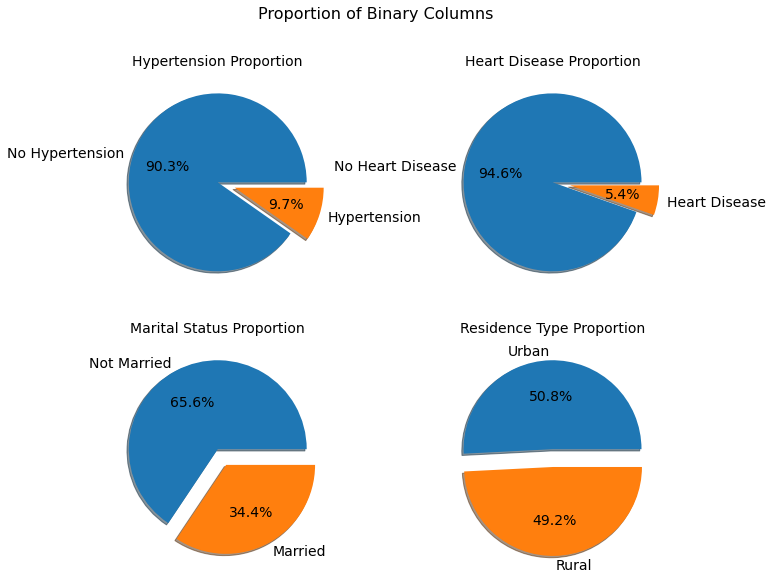

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(11, 9))
binary_feature = ['hypertension','heart_disease','marital_status','residence_type']

for i in range(len(binary_feature)):
  feature = binary_feature[i]
  prop_data = stroke_df[feature].value_counts(normalize=True)
  feature = ' '.join(feature.split('_')).title()

  if feature == 'Marital Status':
    labels = ['Not Married', 'Married']
  elif feature == 'Residence Type':
    labels = prop_data.index
  else:
    labels = ['No '+ feature,feature]
  
  ax[i // 2,i % 2].pie(x = prop_data, 
      labels = labels,
      explode = [0, 0.2],
      autopct = '%1.1f%%', 
      textprops = {'fontsize': 14}, 
      shadow = True)
  ax[i // 2,i % 2].set_title(feature+' Proportion', size=14)
fig.suptitle('Proportion of Binary Columns',size=16)    
plt.show()

### Non-Binary variables

Univariate Analysis of Non-Categorical Binary Variables

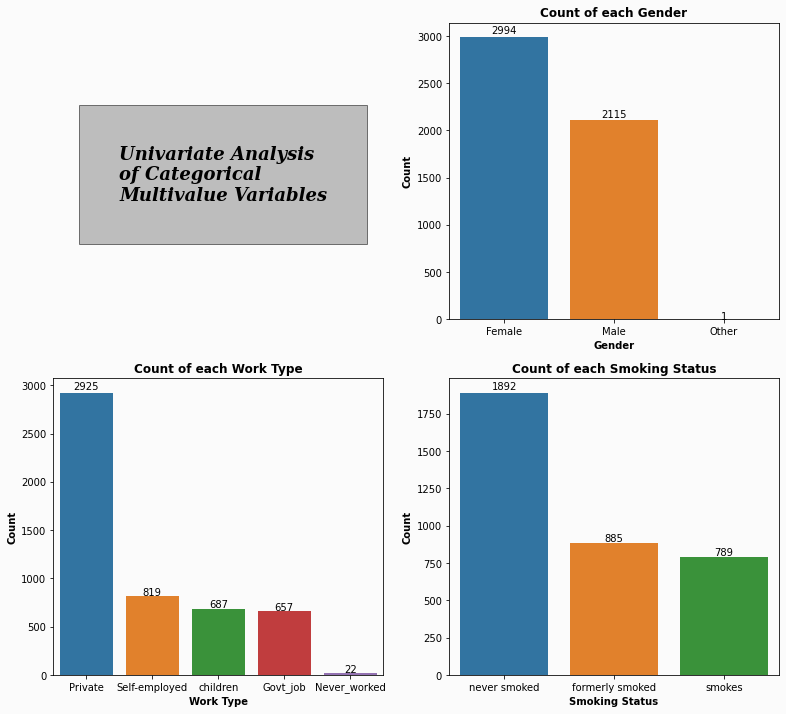

In [19]:
non_bin_columns = ['','gender','work_type', 'smoking_status']

fig, ax = plt.subplots(2, 2, figsize=(13, 12))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)

for i in range(len(non_bin_columns)):
  ax[i // 2,i % 2].set_facecolor(background_color)
  if i == 0:
    ax[i // 2,i % 2].text(x=0.2, y=0.4, 
                          s='Univariate Analysis \nof Categorical \nMultivalue Variables', 
                          fontsize=18, fontfamily='serif', fontweight='bold', fontstyle='italic',
                          bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 40})
    ax[i//2,i%2].axis('off')
  else:
    feature = non_bin_columns[i]
    feature_count = stroke_df[feature].value_counts().reset_index().rename(columns={feature:'count', 'index':feature})
    plot = sns.barplot(data=feature_count, y='count', x=feature,ax=ax[i // 2,i % 2])

    for index, row in feature_count.iterrows():
        plot.text(x=index, y=row['count']*1.012, s=row['count'], 
                  ha='center', color='black')
    
    feature = ' '.join(feature.split('_')).title()
    ax[i // 2,i % 2].set_title('Count of each '+ feature, fontsize=12, fontweight='bold')
    ax[i // 2,i % 2].set_xlabel(feature, fontweight='bold')
    ax[i // 2,i % 2].set_ylabel('Count', fontweight='bold')
plt.show()

## Continuous Variables
Univariate Analysis of Categorical Variables

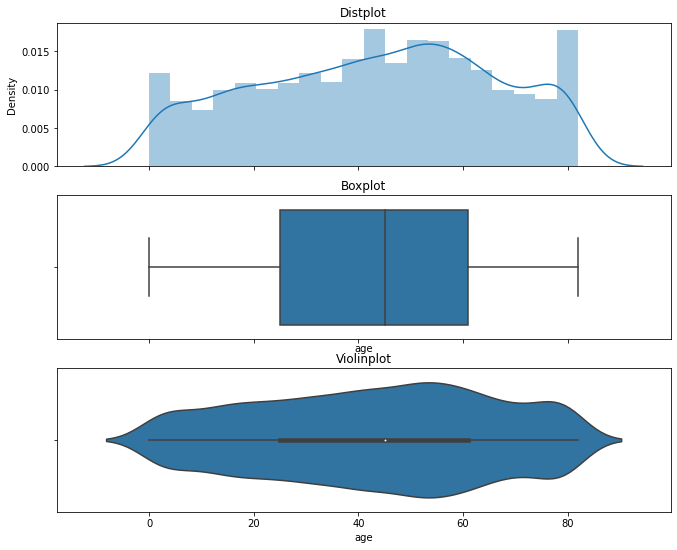

In [20]:
get_categ_plot(stroke_df.age)

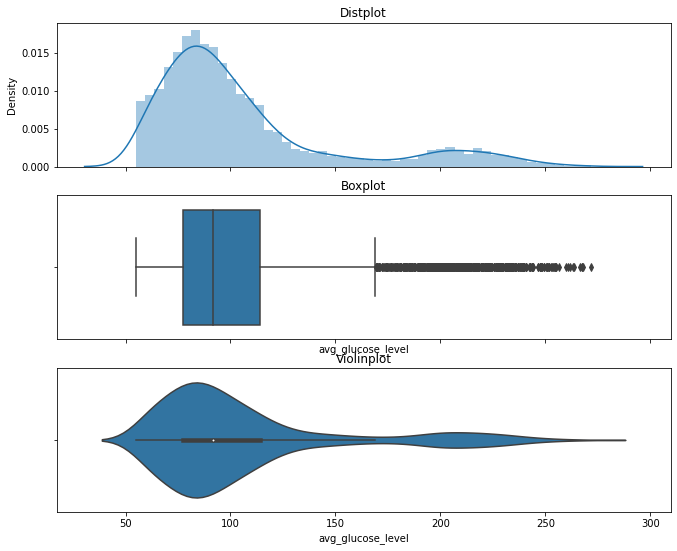

In [21]:
get_categ_plot(stroke_df.avg_glucose_level)

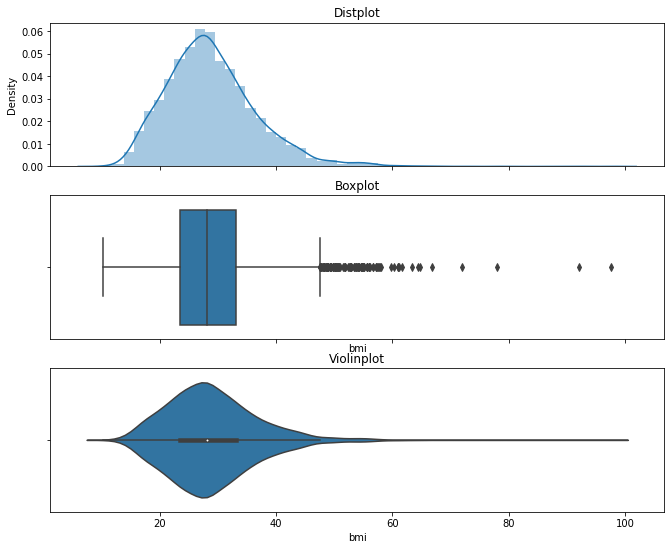

In [22]:
get_categ_plot(stroke_df.bmi)

## Target Variable

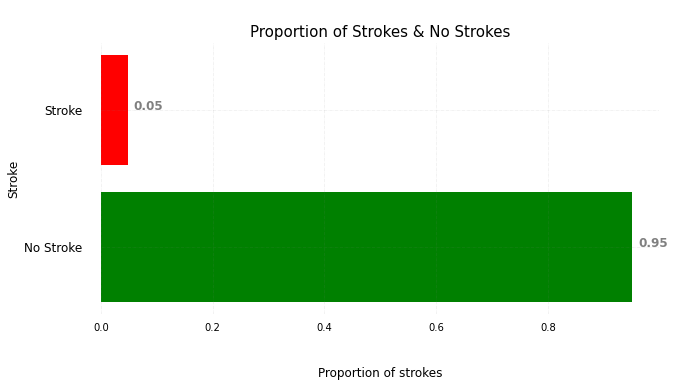

In [23]:
horizontal_bars(['No Stroke', 'Stroke'], 
                [stroke_df.stroke.value_counts(normalize=True)[0], 
                 stroke_df.stroke.value_counts(normalize=True)[1]], 
                '\nProportion of Strokes & No Strokes')

# Bivariate Analysis

## Correlation Matrix

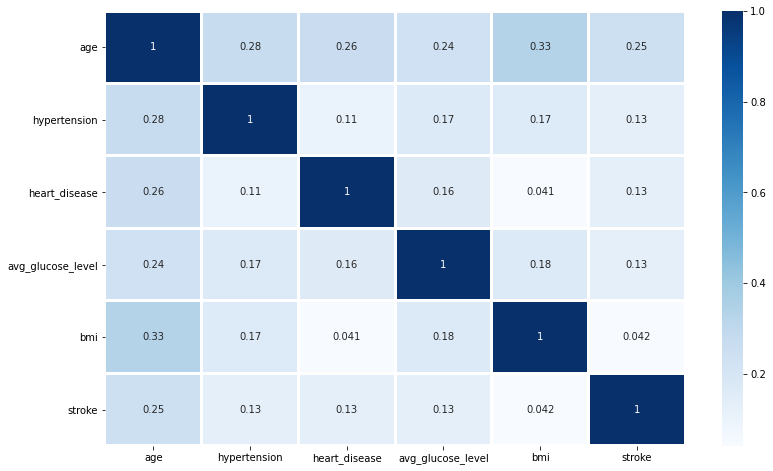

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))
sns.heatmap(stroke_df.corr(), annot=True, ax=ax, linewidth=2, cmap='Blues')
plt.show()

## Stroke and Categorical

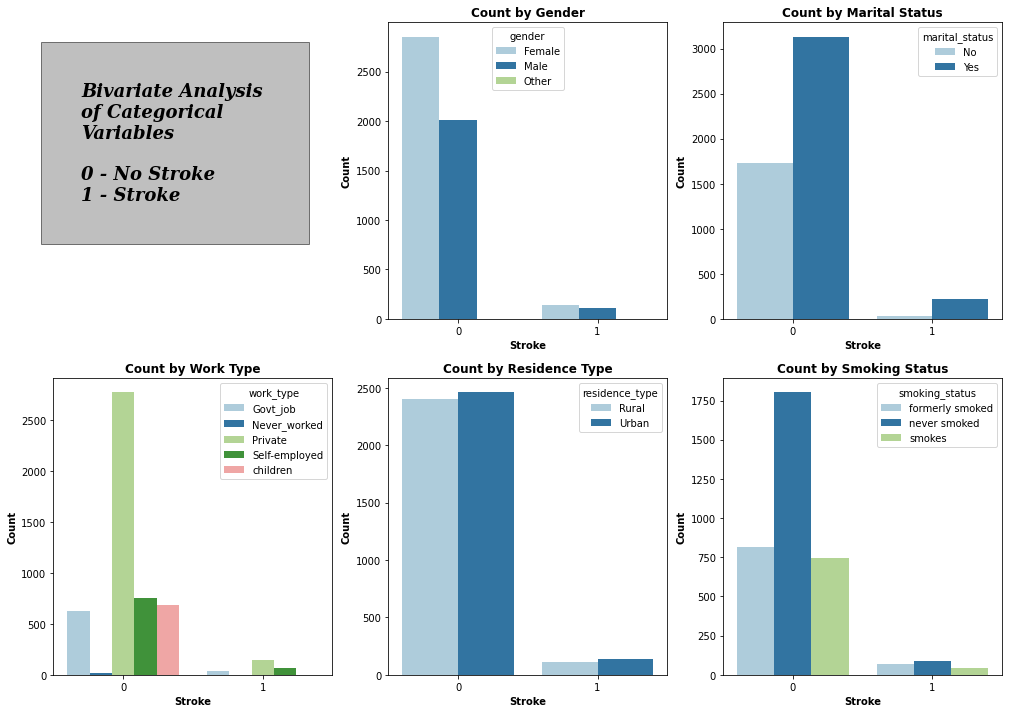

In [25]:
categorical_columns = ['', 'gender', 'marital_status', 'work_type', 'residence_type', 'smoking_status']

fig, ax = plt.subplots(2, 3, figsize=(17, 12))
for i in range(len(categorical_columns)):
  if i == 0:
    ax[i // 2,i % 2].text(x=0.1, y=0.4, 
                          s='Bivariate Analysis \nof Categorical \nVariables\n\n0 - No Stroke\n1 - Stroke', 
                          fontsize=18, fontfamily='serif', fontweight='bold', fontstyle='italic',
                          bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 40})
    ax[i//2,i%2].axis('off')
  else:
    column = categorical_columns[i]
    extracted_df = stroke_df.groupby([column, 'stroke']).size().reset_index(name='count')
    graph = sns.barplot(data=extracted_df, x='stroke', y='count', 
                      hue=column, palette='Paired', ax=ax[i//3, i%3])

    graph.set_xlabel('Stroke', fontweight='bold')
    graph.set_ylabel('Count', fontweight='bold')
    graph.set_title('Count by ' + ' '.join(column.split('_')).title(), fontweight='bold')

plt.show()

## Stroke and Age

In [26]:
bin_labels = [str(i) + ' - ' + str(i+9) for i in range(1, 90, 10)]
bin_edges = range(0, 100, 10)
proportion_stroke = get_stroke_rel('age',bin_labels,bin_edges)
proportion_stroke

,type_level,prop_of_stroke
0,1 - 10,0.215517
1,11 - 20,0.193050
2,21 - 30,0.000000
3,31 - 40,0.890208
4,41 - 50,2.029770
5,51 - 60,5.953827
6,61 - 70,8.249158
7,71 - 80,17.676768
8,81 - 90,19.827586


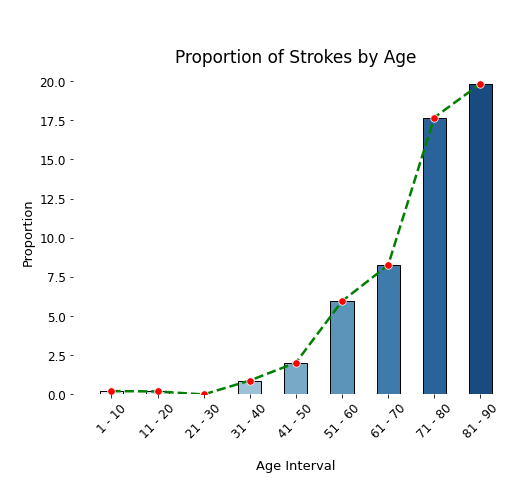

In [27]:
get_barplot(proportion_stroke,'Age Interval','Proportion','Proportion of Strokes by Age',line=True)

## Stroke and Average glucose level

Assumed Bio intervals

Range inclusive

*   0-69 Hypoglycemia
*   70-99 Normoglycemia
*   100 - 125 Prediabetes
*   More than 125 - Diabetes 

Reference - https://2.bp.blogspot.com/-QSGz7kZ9k-o/W_F3fA1U9zI/AAAAAAAAC-M/udhZeC1hm-0ppf5zGBAFSkNjOF5HPB0AgCLcBGAs/s1600/blood%2Bglucose%2Blevel%2Bchart.png






In [28]:
bin_labels = ['Hypoglycemia','Normoglycemia','Prediabetes','Borderline Diabetes','Diabetes']
bin_edges = [-1,70,100,126,181,float('inf')]
proportion_stroke = get_stroke_rel('avg_glucose_level',bin_labels,bin_edges)
proportion_stroke

,type_level,prop_of_stroke
0,Hypoglycemia,3.571429
1,Normoglycemia,3.578947
2,Prediabetes,3.707415
3,Borderline Diabetes,5.459057
4,Diabetes,13.494810


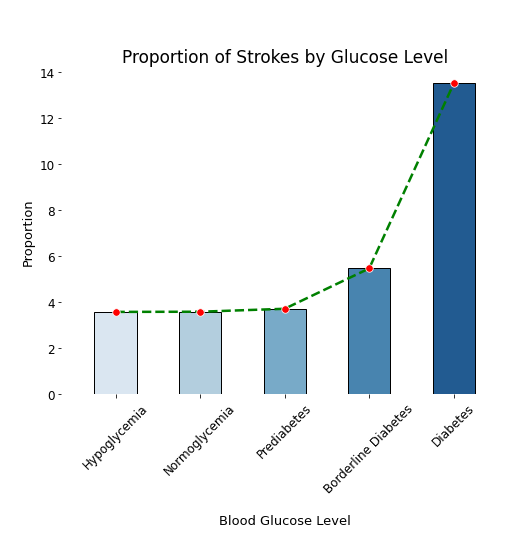

In [29]:
get_barplot(proportion_stroke,'Blood Glucose Level','Proportion','Proportion of Strokes by Glucose Level',line=True)

## Stroke and BMI

Assumed Bio intervals

Range inclusive

*   less than 18.5 Underweight
*   18.5 - 24.9 Normal
*   25 - 29.9 Overweight
*   30 - 34.9 Obese
*   more than 35 Extremely Obese


Reference- https://www.cdc.gov/healthyweight/images/assessing/bmi-adult-fb-600x315.jpg

In [30]:
bin_labels = ['Underweight','Normal','Overweight','Obese','Extremely Obese']
bin_edges = [-float('inf'), 19, 26, 31, 36, float('inf')]
proportion_stroke = get_stroke_rel('avg_glucose_level',bin_labels,bin_edges)
proportion_stroke

,type_level,prop_of_stroke
0,Underweight,NaN
1,Normal,NaN
2,Overweight,NaN
3,Obese,NaN
4,Extremely Obese,4.872798


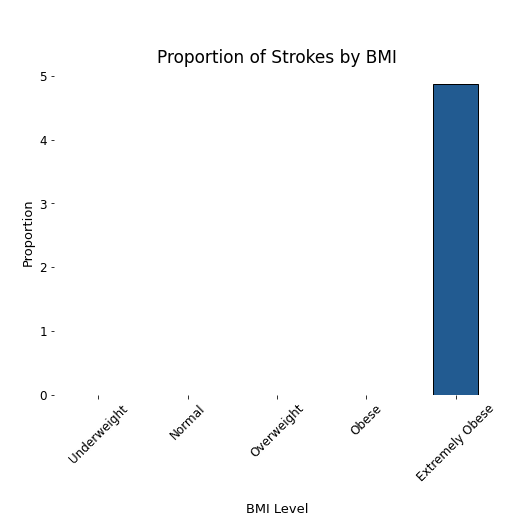

In [31]:
get_barplot(proportion_stroke,'BMI Level','Proportion','Proportion of Strokes by BMI')

# Assumptions

We are assuming unit of average glucose level in blood to be mg/dl (miligram/decilitre) and we have taken fasting glucose level bio reference interval